In [1]:
from hrr import HRR
import matplotlib.pyplot as plt
import numpy as np
from approximation import Approximation
%matplotlib inline

HRR.verbose = False

def fn_square(x):
    return x*x

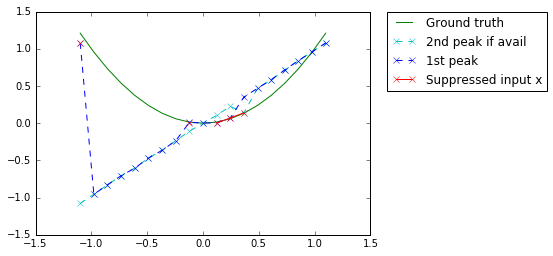

In [9]:
HRR.visualize = False
appr = Approximation(fn=fn_square, size=3000)
HRR.incremental_weight = 0.5
appr.learn(in_range=(-1.1, 1.1), n_samples=200, stddev=0.02, use_incremental=False)
appr.plot_result(n_samples=19)

In [ ]:
num_train_samples = 100
num_test_samples = 20

# test different stddev:
plt.figure()
plt_handles = []
for i in range(1, 10):
    appr = Approximation(fn=fn_square, size=1000)
    appr.learn(in_range=(-1.0, 1.0), n_samples=num_train_samples, stddev=(i * 0.001))
    X = np.linspace(HRR.input_range[0], HRR.input_range[1], num_test_samples)
    Y_hrr = np.empty(num_test_samples, dtype=float)
    Y_np = np.empty(num_test_samples, dtype=float)
    for j, x in enumerate(X):
        A = HRR(x)
        B = A * appr.T
        Y_hrr[j] = B.decode()
        #Y_np[j] = self.fn(x)
    handle, = plt.plot(X, Y_hrr, label="stddev {}".format(i * 0.001))
    plt_handles.append(handle)
    
plt.legend(handles=plt_handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()


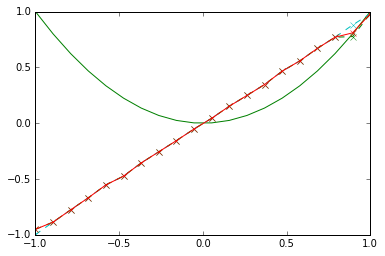

In [3]:
appr = Approximation(fn=fn_square, size=1000)
appr.learn(in_range=(-1.0, 1.0), n_samples=20, stddev=0.02)
appr.plot_result(n_samples=20)

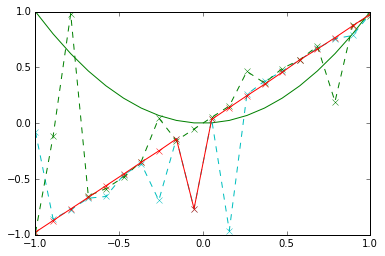

In [4]:
# this test shows that lower stddev seems to yield better results
appr = Approximation(fn=fn_square, size=1000)
appr.learn(in_range=(-1.0, 1.0), n_samples=20, stddev=0.006)
appr.plot_result(n_samples=20)

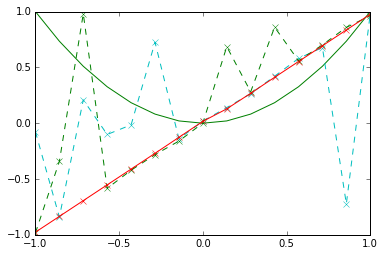

In [7]:
# obviously, probing the result at the same values as the sampling points yields better results, too
appr = Approximation(fn=fn_square, size=1000)
appr.learn(in_range=(-1.0, 1.0), n_samples=20, stddev=0.006)
appr.plot_result(n_samples=15)  # test different x values (n=15) than training (n=20)

In [ ]:
def fn_other(x):
    return 2*x**3 + x**2 - 2*x

appr = Approximation(fn=fn_other, size=1000)
appr.learn(in_range=(-3.0, 3.0), n_samples=20, stddev=0.003)
appr.plot_result(n_samples=20)

X = np.linspace(HRR.input_range[0], HRR.input_range[1], 20)
from hrr import smooth
for i, x in enumerate(X):
    A = HRR(x)
    B = A * appr.T
    #HRR.plot(HRR.reverse_permute(HRR(x).memory))
    #HRR.plot(HRR.reverse_permute(B.memory))
    B_smooth = smooth(HRR.reverse_permute(B.memory), window_len=(HRR.size * 0.01))
    HRR.plot(B_smooth)

In [ ]:
def fn_sigmoid(x):
    return 1.0 / (1.0 + np.e**(-x))

appr = Approximation(fn=fn_sigmoid, size=1000)
appr.learn(in_range=(-6.0, 6.0), n_samples=20, stddev=0.006)
appr.plot_result(n_samples=20)

In [ ]:
appr = Approximation(fn=np.sin, size=1000)
appr.learn(in_range=(0.0, 2 * np.pi), n_samples=20, stddev=0.006)
appr.plot_result(n_samples=20)